In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv("Bank_data.csv")

In [7]:
dataset.head(4)

,loan_id,married,gender,dependency,Self_Employee,Applicant,coapplicant,Loan_amount,creadit_his,propert,loan_status
0,LN1000,Yes,Female,0,Yes,17154.0,13688.0,133487.0,0.0,Rural,Rejected
1,LN1001,Yes,Male,0,Yes,NaN,2995.0,50849.0,1.0,Urban,Rejected
2,LN1002,Yes,Male,1,No,21923.0,3046.0,85520.0,0.0,Semiurban,Rejected
3,LN1003,NaN,Female,3+,No,19718.0,14947.0,NaN,1.0,Rural,Rejected


In [8]:
dataset.isnull().sum()

loan_id           0
married          23
gender           32
dependency       17
Self_Employee    25
Applicant        38
coapplicant      27
Loan_amount      32
creadit_his      26
propert          27
loan_status      25
dtype: int64

In [9]:
dataset["coapplicant"].fillna(dataset["coapplicant"].mode()[0] , inplace=True)
dataset["Applicant"].fillna(dataset["Applicant"].mode()[0] , inplace=True)

C:\Users\lenovo\anaconda3\ipykernel_7948\646614782.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["coapplicant"].fillna(dataset["coapplicant"].mode()[0] , inplace=True)
C:\Users\lenovo\anaconda3\ipykernel_7948\646614782.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

<Axes: xlabel='coapplicant'>

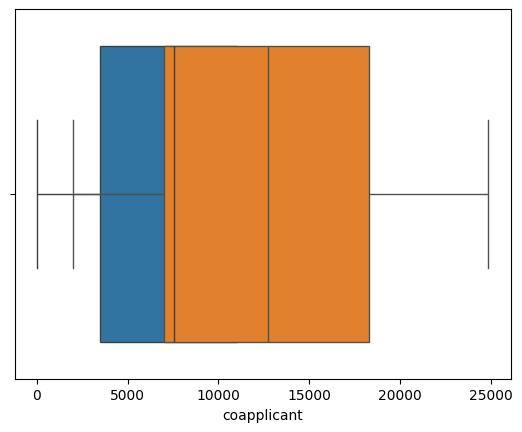

In [10]:
sns.boxplot(x="coapplicant", data=dataset)
sns.boxplot(x="Applicant", data=dataset)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
ss = StandardScaler()
ss.fit(dataset[["Applicant"]])

StandardScaler()

In [13]:
dataset["Applicant_ss"]=pd.DataFrame(ss.transform(dataset[["Applicant"]]), columns=["x"])

In [14]:
dataset.head(4)

,loan_id,married,gender,dependency,Self_Employee,Applicant,coapplicant,Loan_amount,creadit_his,propert,loan_status,Applicant_ss
0,LN1000,Yes,Female,0,Yes,17154.0,13688.0,133487.0,0.0,Rural,Rejected,0.649562
1,LN1001,Yes,Male,0,Yes,6287.0,2995.0,50849.0,1.0,Urban,Rejected,-1.046070
2,LN1002,Yes,Male,1,No,21923.0,3046.0,85520.0,0.0,Semiurban,Rejected,1.393692
3,LN1003,NaN,Female,3+,No,19718.0,14947.0,NaN,1.0,Rural,Rejected,1.049635


In [15]:
dataset["Applicant"].mean()  #Mean of Applicant column

np.float64(12991.076051779935)

In [16]:
import numpy as np

In [17]:
np.std(dataset["Applicant"]) #standard deviation of applicant

np.float64(6408.820423885172)

In [18]:
dataset.describe()

,Applicant,coapplicant,Loan_amount,creadit_his,Applicant_ss
count,618.000000,618.000000,586.000000,592.000000,6.180000e+02
mean,12991.076052,7442.606796,281483.752560,0.493243,-8.623091e-18
std,6414.011855,4247.423432,130467.934829,0.500377,1.000810e+00
min,2001.000000,35.000000,50613.000000,0.000000,-1.714836e+00
25%,6991.500000,3505.500000,168083.250000,0.000000,-9.361436e-01
50%,12725.000000,7553.500000,291088.000000,0.000000,-4.151716e-02
75%,18289.750000,11008.500000,397510.000000,1.000000,8.267783e-01
max,24852.000000,14974.000000,497045.000000,1.000000,1.850719e+00
